In [1]:
import pandas as pd
import matplotlib.pyplot as plt


## Read in teams and data
data = pd.read_csv('stats/teams.csv')
data_dict = data.to_dict(orient='records')

teams = {}
for team in data_dict:
    teams.update({team['Name'] : team})

# print(teams)

## For each team get their stats into a dataframe and append to respecitve dicts
for team in teams:
    url = 'https://www.baseball-reference.com/teams/' + teams[team]['Acronym'] + '/2023.shtml'
    
    team_stats = pd.read_html(url)
    
    batting_stats = team_stats[0]
    pitching_stats = team_stats[1]

    teams[team]['Batting Stats'] = batting_stats
    teams[team]['Pitching Stats'] = pitching_stats

reds_batting = teams['Cincinnati Reds']['Batting Stats']
print(reds_batting.loc[reds_batting['Name'] == 'Matt McLain'][['Name', 'Age', 'PA', 'OPS']])

           Name Age   PA   OPS
10  Matt McLain  23  403  .864


0     44
1     31
2     98
3     81
4     34
5     86
6     95
7     75
8     62
10    64
11    43
12    20
13    17
14    24
15     6
16     7
17     8
18     8
19     3
20     8
21     1
22     3
23     1
25     0
Name: R, dtype: object
0     44
1     31
2     98
3     81
4     34
5     86
6     95
7     75
8     62
10    64
11    43
12    20
13    17
14    24
15     6
16     7
17     8
18     8
19     3
20     8
21     1
22     3
23     1
25     0
Name: R, dtype: int64
1    0.299
Name: OBP, dtype: float64


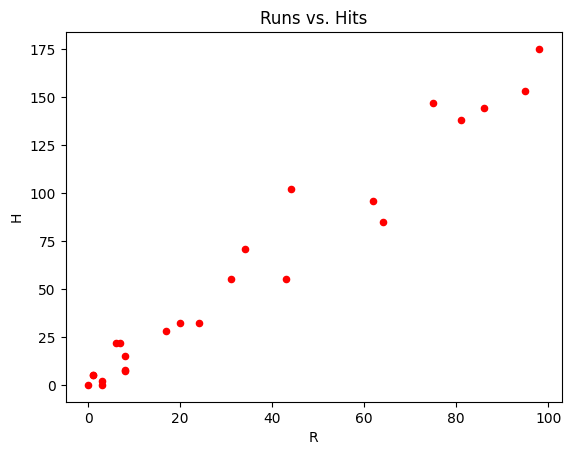

In [16]:
CHC_stats = teams['Chicago Cubs']['Batting Stats']

CHC_stats = CHC_stats[CHC_stats['Rk'] != 'Rk']
CHC_stats = CHC_stats[CHC_stats['Rk'].notnull()]
CHC_stats = CHC_stats[CHC_stats['OBP'].notnull()]
print(CHC_stats['R'])

CHC_stats['OBP'] = pd.to_numeric(CHC_stats['OBP'])
CHC_stats['R'] = pd.to_numeric(CHC_stats['R'])
CHC_stats['H'] = pd.to_numeric(CHC_stats['H'])

print(CHC_stats['R'])

print(CHC_stats.loc[CHC_stats['Name'] == 'Trey Mancini']['OBP'])

# scatter plot
CHC_stats.plot(kind='scatter',
        x='R',
        y='H',
        color='red')
 
# # set the title
plt.title('Runs vs. Hits')
 
# # show the plot
plt.show()